In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('my_file.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,30-JAN-2024,21775.75,21813.05,21501.80,21522.10,375137333.0,32916.30
1,31-JAN-2024,21487.25,21741.35,21448.85,21725.70,410583065.0,41587.85
2,01-FEB-2024,21780.65,21832.95,21658.75,21697.45,332541208.0,34042.15
3,02-FEB-2024,21812.75,22126.80,21805.55,21853.80,442794738.0,38395.90
4,05-FEB-2024,21921.05,21964.30,21726.95,21771.70,440849699.0,33807.94


In [ ]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64


In [ ]:
data['Turnover (₹ Cr)'] = data['Turnover (₹ Cr)'].fillna(data['Turnover (₹ Cr)'].mean())


In [ ]:
# Compute IQR Q1 = df['price'].quantile(0.25) Q3 = df['price'].quantile(0.75) IQR = Q3 - Q1 # Define caps lower_bound = Q1 - 1.5 * IQR upper_bound = Q3 + 1.5 * IQR # Apply winsorization (capping) df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price']) df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price']) print(df)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.columns = data.columns.str.strip()


In [ ]:
import numpy as np

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert to numeric (timestamp)
data['Date_numeric'] = data['Date'].astype(np.int64)  # Convert to nanoseconds

# Calculate IQR on numeric data
Q1 = data['Date_numeric'].quantile(0.25)
Q3 = data['Date_numeric'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply IQR filtering
data['Date_numeric'] = np.where(data['Date_numeric'] > upper_bound, upper_bound, data['Date_numeric'])
data['Date_numeric'] = np.where(data['Date_numeric'] < lower_bound, lower_bound, data['Date_numeric'])

# Convert back to datetime
data['Date'] = pd.to_datetime(data['Date_numeric'])

# Drop the numeric column if no longer needed
data.drop(columns=['Date_numeric'], inplace=True)

print(data)

          Date      Open      High       Low     Close  Shares Traded  \
0   2024-01-30  21775.75  21813.05  21501.80  21522.10    375137333.0   
1   2024-01-31  21487.25  21741.35  21448.85  21725.70    410583065.0   
2   2024-02-01  21780.65  21832.95  21658.75  21697.45    332541208.0   
3   2024-02-02  21812.75  22126.80  21805.55  21853.80    442794738.0   
4   2024-02-05  21921.05  21964.30  21726.95  21771.70    440849699.0   
..         ...       ...       ...       ...       ...            ...   
245 2025-01-23  23128.30  23270.80  23090.65  23205.35    275558357.0   
246 2025-01-24  23183.90  23347.30  23050.00  23092.20    264336332.0   
247 2025-01-27  22940.15  23007.45  22786.90  22829.15    257372790.0   
248 2025-01-28  22960.45  23137.95  22857.65  22957.25    361868609.0   
249 2025-01-29  23026.75  23183.35  22976.50  23163.10    251208119.0   

     Turnover (₹ Cr)  
0           32916.30  
1           41587.85  
2           34042.15  
3           38395.90  
4       

<ipython-input-92-f4a598684321>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Data available from 2024-01-30 to 2025-01-29

Enter start date (e.g., 12-FEB-2024 or 2024-02-12): 2024-02-19
Enter end date (e.g., 12-MAR-2024 or 2024-03-12): 2024-09-19


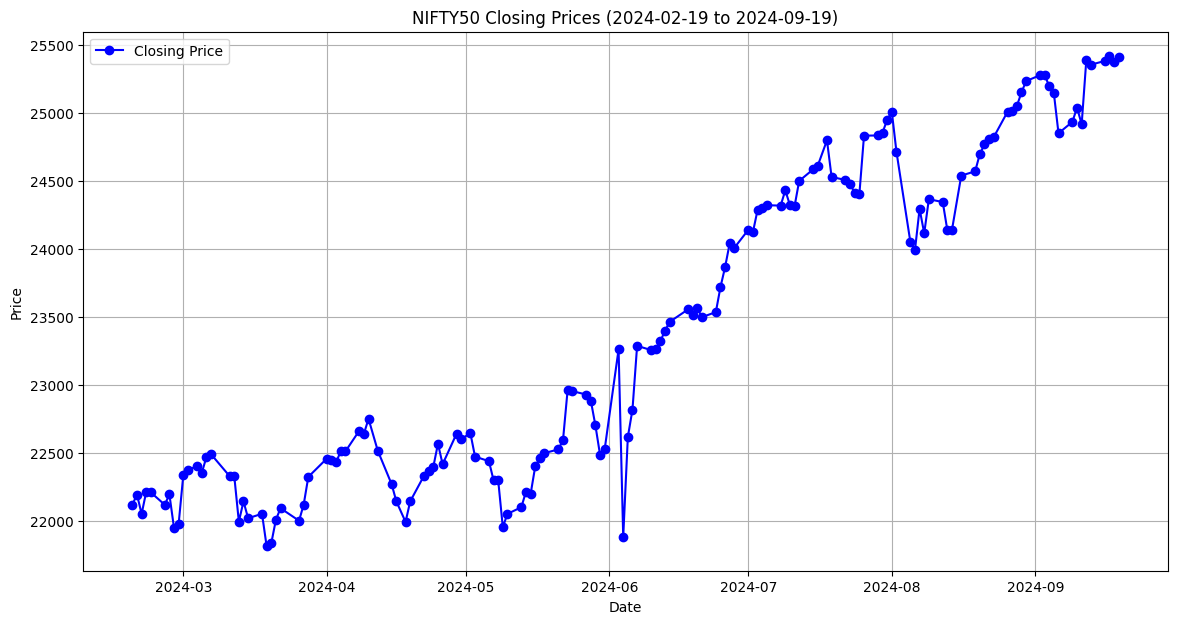


Volatility (Standard Deviation of Daily Changes): 0.92%


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
file_path = 'my_file.csv'  
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y')
df = df.dropna()
print(f"Data available from {df['date'].min().date()} to {df['date'].max().date()}")
start_input = input("\nEnter start date (e.g., 12-FEB-2024 or 2024-02-12): ")
end_input = input("Enter end date (e.g., 12-MAR-2024 or 2024-03-12): ")
start_date = pd.to_datetime(start_input)
end_date = pd.to_datetime(end_input)
filtered_df = df[
    (df['date'] >= start_date) &
    (df['date'] <= end_date)
].copy() 
if filtered_df.empty:
    print("\nNo data found for the selected dates.")
else:
    filtered_df['daily_pct_change'] = filtered_df['close'].pct_change() * 100
    # Calculate volatility
    volatility = filtered_df['daily_pct_change'].std()
    # Plot closing prices
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_df['date'], filtered_df['close'], marker='o', color='blue', label='Closing Price')
    plt.title(f'NIFTY50 Closing Prices ({start_date.date()} to {end_date.date()})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.show()
    print(f"\nVolatility (Standard Deviation of Daily Changes): {volatility:.2f}%")










In [ ]:
df.head()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Stock Symbol
Date,,,,,,,
2024-01-30,21775.75,21813.05,21501.80,21522.10,375137333.0,32916.30,MSFT
2024-01-31,21487.25,21741.35,21448.85,21725.70,410583065.0,41587.85,AAPL
2024-02-01,21780.65,21832.95,21658.75,21697.45,332541208.0,34042.15,SPY
2024-02-02,21812.75,22126.80,21805.55,21853.80,442794738.0,38395.90,SPY
2024-02-05,21921.05,21964.30,21726.95,21771.70,440849699.0,33807.94,AAPL


In [8]:
import random 
df=pd.read_csv('my_file.csv')
stock_symbols = ["RELIANCE", "TCS", "INFY", "HDFCBANK", "ICICIBANK", "HINDUNILVR", "ITC", "SBIN", "BAJFINANCE", "KOTAKBANK"]


random_stock_symbols = [random.choice(stock_symbols) for _ in range(250)]

df = pd.read_csv("my_file.csv")


df["Stock Symbol"] = random_stock_symbols

df.to_csv("updated_file.csv", index=False)
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")
df.set_index("Date", inplace=True)



monthly_avg = df.groupby('Stock Symbol').resample('ME').agg({
    'Shares Traded': 'mean',
    'Close': 'mean'
}).reset_index()

quarterly_avg = df.groupby('Stock Symbol').resample('Q').agg({
    'Shares Traded': 'mean',
    'Close': 'mean'
}).reset_index()


import matplotlib.pyplot as plt

df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['Close'], label='Stock Price')

plt.title('Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



/var/folders/_w/9byvnb796m3gj24zykk6kx340000gp/T/ipykernel_43672/2191863052.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = df.groupby('Stock Symbol').resample('Q').agg({


KeyError: 'Date'

In [ ]:
print(df)

                Open      High       Low     Close  Shares Traded  \
Date                                                                
2024-01-30  21775.75  21813.05  21501.80  21522.10    375137333.0   
2024-01-31  21487.25  21741.35  21448.85  21725.70    410583065.0   
2024-02-01  21780.65  21832.95  21658.75  21697.45    332541208.0   
2024-02-02  21812.75  22126.80  21805.55  21853.80    442794738.0   
2024-02-05  21921.05  21964.30  21726.95  21771.70    440849699.0   
...              ...       ...       ...       ...            ...   
2025-01-23  23128.30  23270.80  23090.65  23205.35    275558357.0   
2025-01-24  23183.90  23347.30  23050.00  23092.20    264336332.0   
2025-01-27  22940.15  23007.45  22786.90  22829.15    257372790.0   
2025-01-28  22960.45  23137.95  22857.65  22957.25    361868609.0   
2025-01-29  23026.75  23183.35  22976.50  23163.10    251208119.0   

            Turnover (₹ Cr) Stock Symbol  
Date                                      
2024-01-30      

In [ ]:
import pandas as pd

# Load the CSV file
data2 = pd.read_csv('my_file.csv')

# Strip leading/trailing spaces from the column names
data2.columns = data2.columns.str.strip()

# Convert the 'Date' column to datetime format (if it's not already)
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce', format='%d-%b-%Y')  # Adjust format if needed

# Create the 'Year_Month' column with period format (Year-Month)
data2['Year_Month'] = data2['Date'].dt.to_period('M')

# Check the results
print(data2.head())


        Date      Open      High       Low     Close  Shares Traded  \
0 2024-01-30  21775.75  21813.05  21501.80  21522.10    375137333.0   
1 2024-01-31  21487.25  21741.35  21448.85  21725.70    410583065.0   
2 2024-02-01  21780.65  21832.95  21658.75  21697.45    332541208.0   
3 2024-02-02  21812.75  22126.80  21805.55  21853.80    442794738.0   
4 2024-02-05  21921.05  21964.30  21726.95  21771.70    440849699.0   

   Turnover (₹ Cr) Year_Month  
0         32916.30    2024-01  
1         41587.85    2024-01  
2         34042.15    2024-02  
3         38395.90    2024-02  
4         33807.94    2024-02  


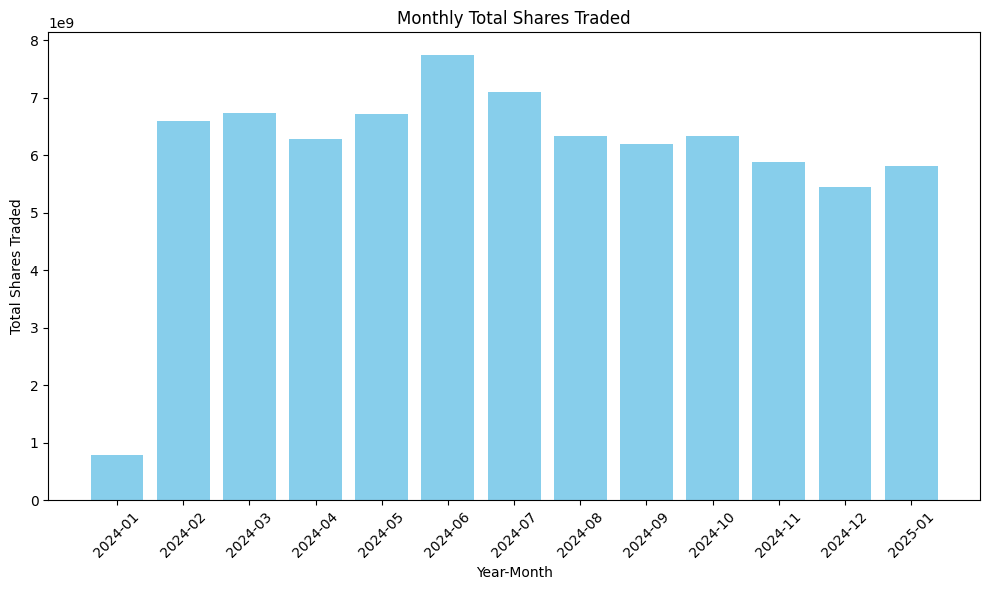

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data2 is already loaded and prepared

# Group by 'Year_Month' and sum the 'Shares Traded' or 'Turnover'
monthly_total = data2.groupby('Year_Month').agg({'Shares Traded': 'sum'}).reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_total['Year_Month'].astype(str), monthly_total['Shares Traded'], color='skyblue')

# Adding titles and labels
plt.title('Monthly Total Shares Traded')
plt.xlabel('Year-Month')
plt.ylabel('Total Shares Traded')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



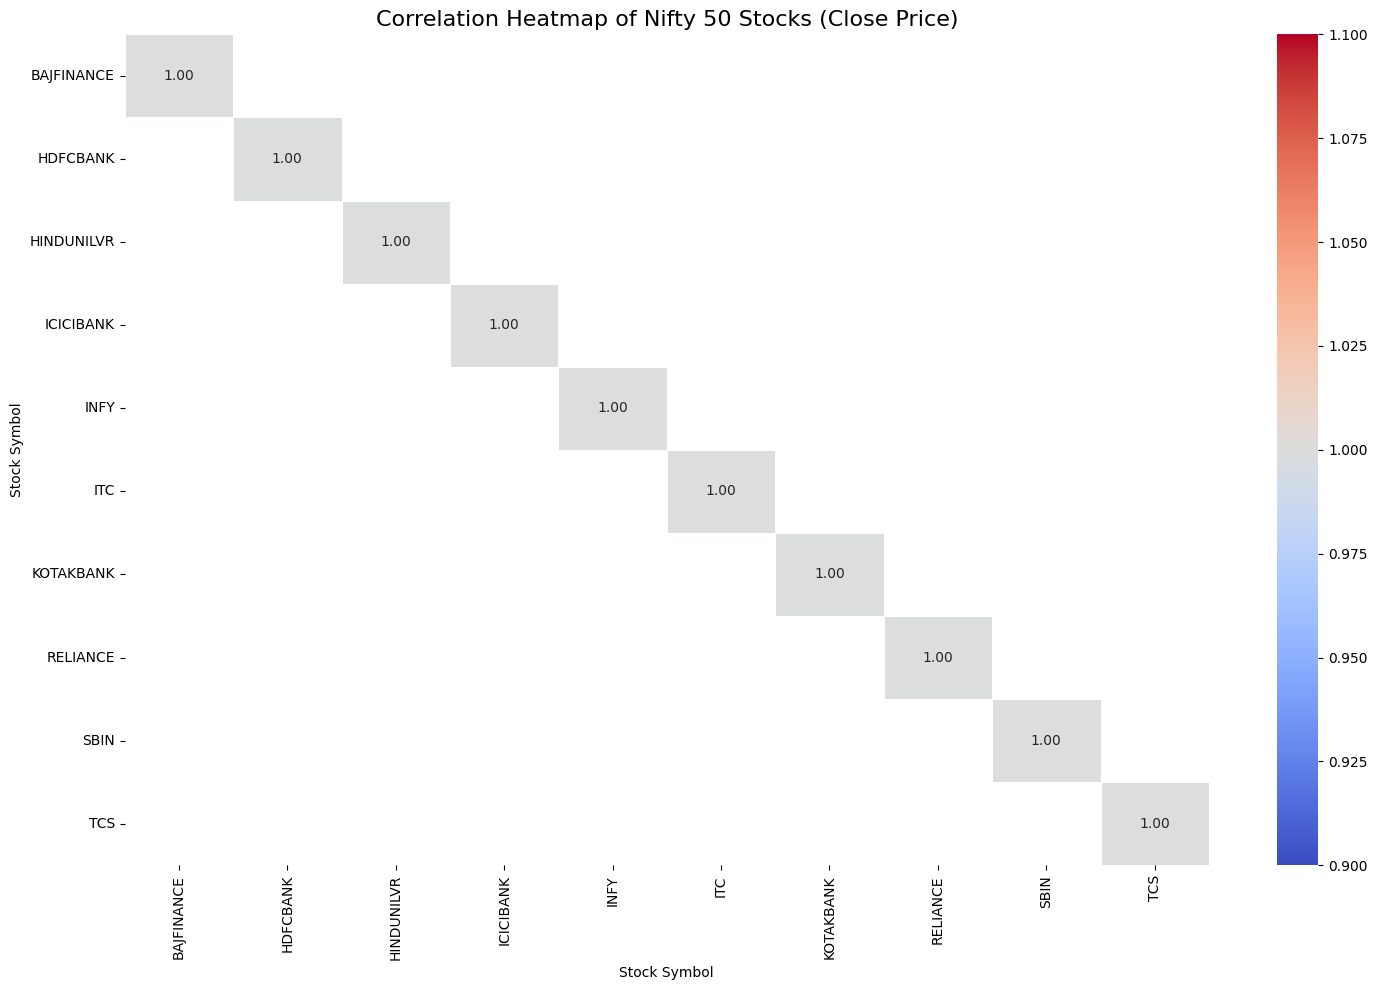

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Step 1: Load the CSV file
data3 = pd.read_csv('my_file.csv')

data3.columns = data3.columns.str.strip()

# Step 2: Convert 'Date' to datetime format
data3['Date'] = pd.to_datetime(data3['Date'], errors='coerce', format='%d-%b-%Y')

# Step 3: Pivot the Data to Reshape for Correlation Calculation
# We will pivot the data to have a multi-index, where the index is Date and columns are Stock Symbols.
# For each stock symbol, we will have a time series for 'Close Price' (or any other price column).

stock_symbols = ["RELIANCE", "TCS", "INFY", "HDFCBANK", "ICICIBANK", "HINDUNILVR", "ITC", "SBIN", "BAJFINANCE", "KOTAKBANK"]


# Generate 250 random stock symbols
random_stock_symbols = [random.choice(stock_symbols) for _ in range(250)]
data3["Stock Symbol"] = random_stock_symbols

# Example: Pivot data based on 'Close Price'
pivot_df = data3.pivot_table(index='Date', columns='Stock Symbol', values='Close')

# Step 4: Calculate the correlation matrix for the 'Close Price' of each stock
correlation_matrix = pivot_df.corr()

# Step 5: Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 6: Customize the heatmap (optional)
plt.title('Correlation Heatmap of Nifty 50 Stocks (Close Price)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

In [ ]:
df.rename(columns={'your_column_name': 'Date'}, inplace=True)